In [1]:
#import library
from __future__ import division
import matplotlib.pyplot as plt
import cv2
import os, glob
import numpy as np
from moviepy.editor import VideoFileClip

#return current direct
cwd = os.getcwd()

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

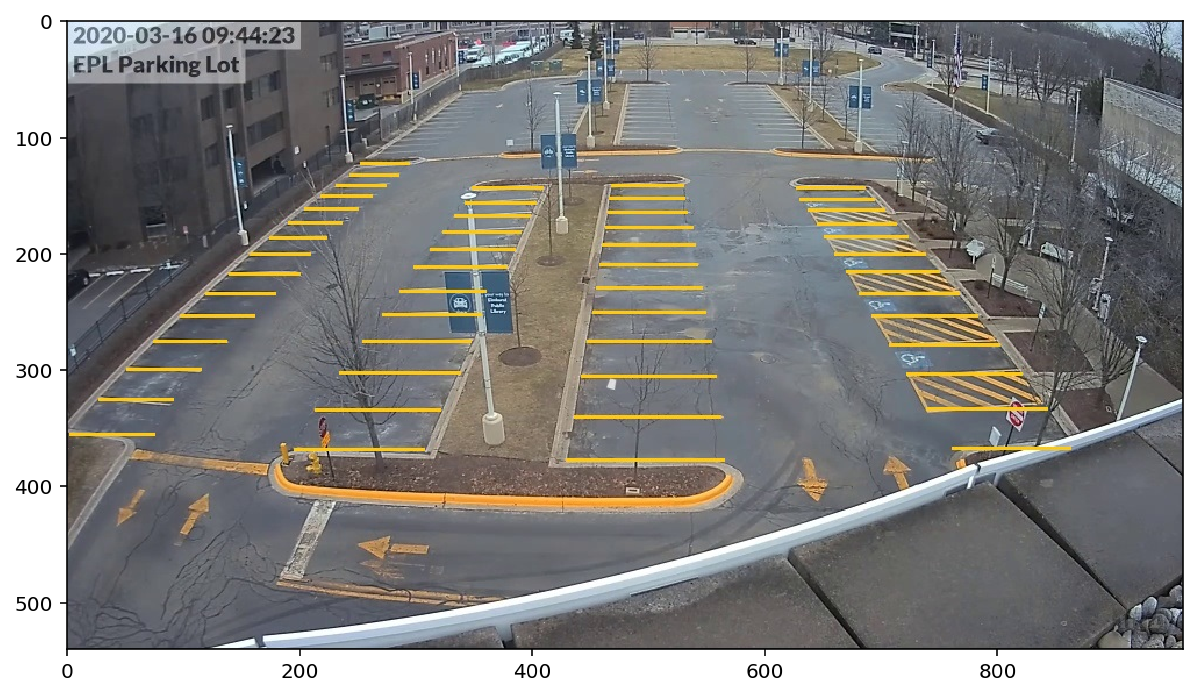

In [2]:
#read a empty space image from car park then change bgr channel to rgb
empty = cv2.imread("frame/extract.jpg")
new1 = empty.copy()
empty = cv2.cvtColor(empty, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(empty)
plt.show()

In [3]:
#use Trackbar to find lower yellow and upper yellow to extract each line.
cv2.namedWindow('image_win')

value = (0, 0, 0)
def update(x):  
    global value
    r_value = cv2.getTrackbarPos('R','image_win')
    g_value = cv2.getTrackbarPos('G', 'image_win')
    b_value = cv2.getTrackbarPos('B', 'image_win')
    r_value1 = cv2.getTrackbarPos('R1','image_win')
    g_value1 = cv2.getTrackbarPos('G1', 'image_win')
    b_value1 = cv2.getTrackbarPos('B1', 'image_win')   
    hsv = cv2.cvtColor(empty, cv2.COLOR_BGR2HSV) #cover color space from bgr to hsv
    lower_white = np.array([r_value,g_value,b_value])
    upper_white = np.array([r_value1,g_value1,b_value1])
    wmask = cv2.inRange(empty, lower_white, upper_white)
    cv2.imshow("ss",wmask)
cv2.createTrackbar('R','image_win',0,255,update)
cv2.createTrackbar('G','image_win',0,255,update)
cv2.createTrackbar('B','image_win',0,255,update)
cv2.createTrackbar('R1','image_win',0,255,update)
cv2.createTrackbar('G1','image_win',0,255,update)
cv2.createTrackbar('B1','image_win',0,255,update)


cv2.setTrackbarPos('R','image_win',165)
cv2.setTrackbarPos('G','image_win',172)
cv2.setTrackbarPos('B','image_win',90)
cv2.setTrackbarPos('R1','image_win',244)
cv2.setTrackbarPos('G1','image_win',206)
cv2.setTrackbarPos('B1','image_win',145)



cv2.waitKey(0)

cv2.destroyAllWindows()

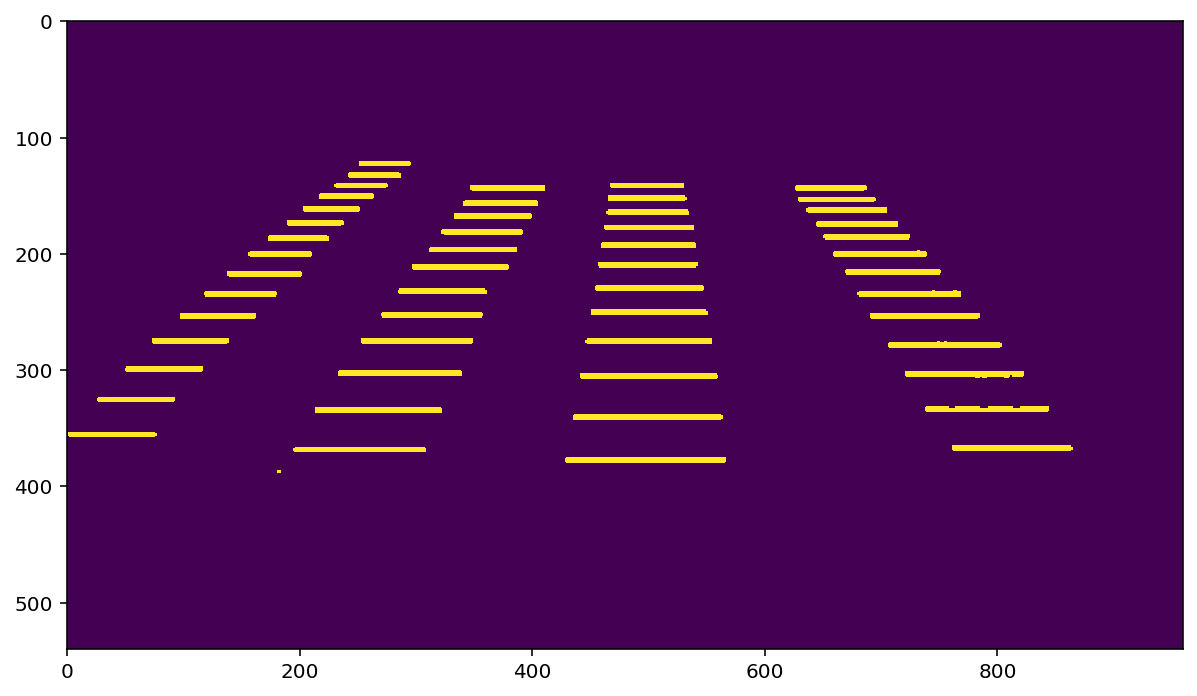

In [4]:
# image is expected be in RGB color space, then find yellow mask
def yellow_mask(image): 
    #hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) #cover color space from bgr to hsv
    lower_yellow = np.array([220,190,44])
    upper_yellow = np.array([246,255,102])
    wmask = cv2.inRange(image, lower_yellow, upper_yellow) 
    #nmask = cv2.bitwise_not(wmask)
    kernel = np.ones((3,3), np.uint8) 
    erorsion_img = cv2.erode(wmask, kernel, iterations=1) #erorsion
    dilate_img = cv2.dilate(wmask, kernel, iterations=1) #dilation
    
    return dilate_img

mask = yellow_mask(empty)
plt.figure(figsize=(10,10))

plt.imshow(mask)
plt.show()

 No lines detected:  190


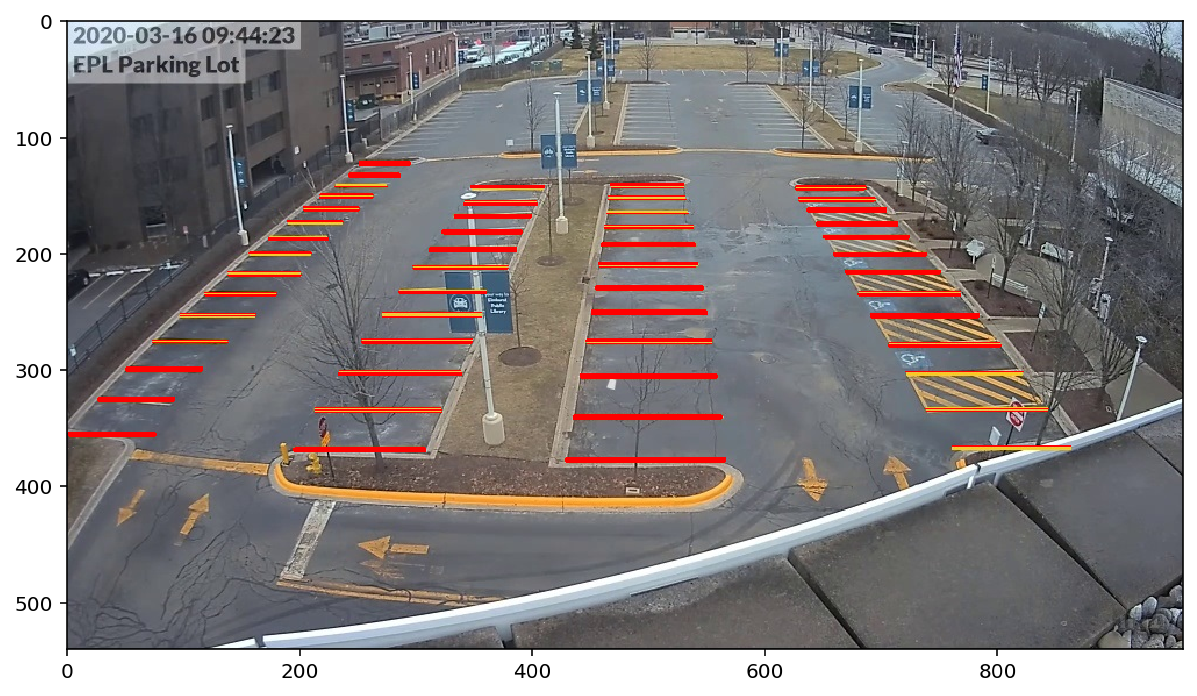

In [5]:
#detect each line from yellow mask
hlp= cv2.HoughLinesP(mask, rho=0.1, theta=np.pi/10, threshold=20, minLineLength=35, maxLineGap=0.1)
#seperate park space by column
parkA = []
parkB = []
parkC = []
parkD = []
#becasue hough line function is not sort each line, so I have to sort line by y-axis
#dram line in the copy of original image
def draw_lines(image, lines, color=[255, 0, 0], thickness=1):
    # the lines returned by cv2.HoughLinesP has the shape (-1, 1, 4)    
    height, width, channels = image.shape
    part = width /4
    for line in lines:
        for x1,y1,x2,y2 in line:              
            if x2> part*2.5 and x2 < width:
                parkA.append((x1,y1,x2,y2)) 
                cv2.line(image, (x1, y1), (x2, y2), color, thickness)                
            elif x2> part*2 and x2< part*2.5:
                parkB.append((x1,y1,x2,y2))
                cv2.line(image, (x1, y1), (x2, y2), color, thickness)               
            elif x2 > part * 1.26  and x2 < part *2:
                parkC.append((x1,y1,x2,y2))
                cv2.line(image, (x1, y1), (x2, y2), color, thickness)            
            else:
                parkD.append((x1,y1,x2,y2))
                cv2.line(image, (x1, y1), (x2, y2), color, thickness)
                
    print(" No lines detected: ", len(parkA)+len(parkB)+len(parkC)+len(parkD))
    return image


testimg = empty.copy()
lines = draw_lines(testimg, hlp)
    
plt.figure(figsize=(10,10))
plt.imshow(lines)
plt.show()

In [6]:
#use to select specified value
def take(elem):
    return elem[1]
#delete extra line which detect by hough line function
def delclose(park, valuec):
    i = 0    
    #sort by specified value
    park.sort(key = take,reverse = True)    
    #delete extra line by very close distance
    while i < len(park)-1:
        y1 = park[i][1]
        y2 = park[i+1][3]
        if abs(y2 - y1)<=valuec:
            del park[i]
            print("delete"+ str(i))
        i = i +1
i = 0
#use loop make sure it is cleaned
while i<4:
    delclose(parkD,5)
    delclose(parkC,5)
    delclose(parkB,5)
    delclose(parkA,5)
    i +=1




delete0
delete1
delete3
delete4
delete6
delete7
delete9
delete10
delete11
delete13
delete15
delete16
delete18
delete19
delete20
delete21
delete22
delete24
delete25
delete27
delete28
delete0
delete1
delete3
delete5
delete6
delete7
delete8
delete9
delete10
delete12
delete14
delete15
delete17
delete18
delete20
delete21
delete22
delete23
delete24
delete0
delete1
delete3
delete4
delete6
delete7
delete9
delete10
delete11
delete12
delete14
delete15
delete17
delete18
delete19
delete20
delete21
delete24
delete25
delete26
delete1
delete3
delete4
delete5
delete6
delete8
delete9
delete10
delete11
delete12
delete13
delete14
delete15
delete16
delete17
delete19
delete20
delete21
delete22
delete24
delete25
delete0
delete2
delete4
delete8
delete9
delete11
delete13
delete14
delete16
delete18
delete0
delete2
delete3
delete4
delete6
delete7
delete8
delete10
delete12
delete13
delete14
delete0
delete2
delete4
delete6
delete7
delete9
delete11
delete12
delete13
delete16
delete3
delete4
delete6
delete7
delete8

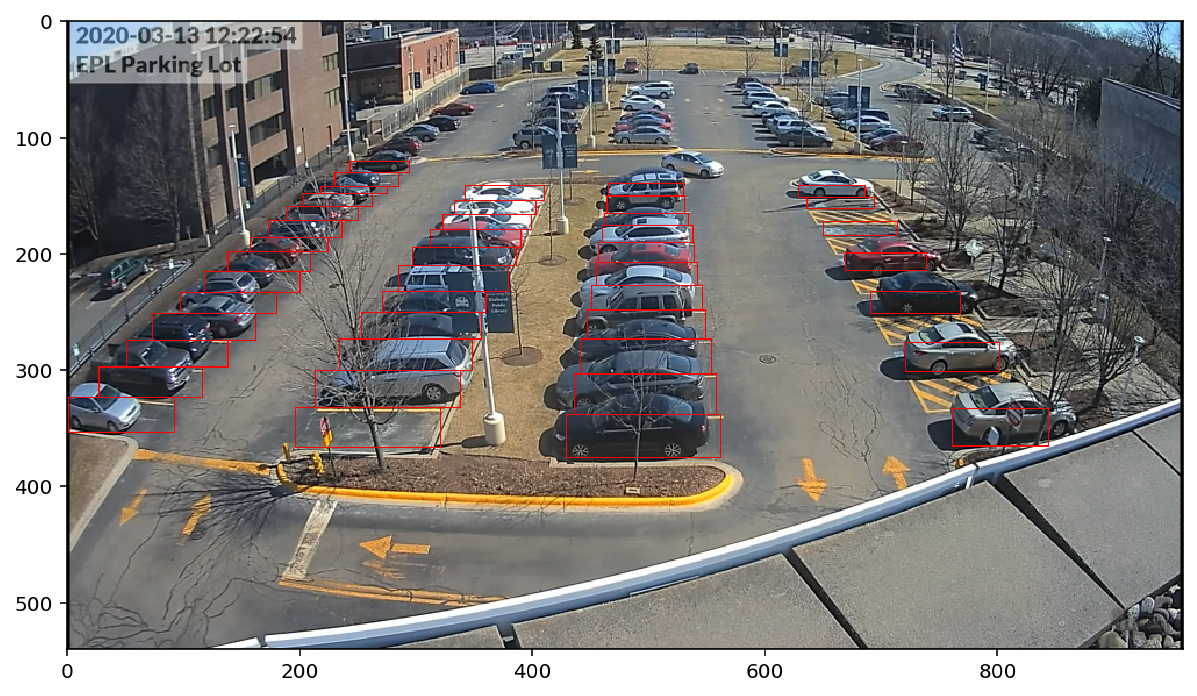

In [7]:
trainimg = cv2.imread("frame/test.jpg")
trainimg = cv2.resize(trainimg, (960, 540))
trainimg = cv2.cvtColor(trainimg, cv2.COLOR_BGR2RGB)
new = trainimg.copy()
#create a empty array list to store all rectangle of car space
all_space = []
#draw all rectangle of car space out
def drawrect(park,miniarea, maxarea,image):
    rect=[]
    i = 0 
    #sort each line by y
    park.sort(key = take,reverse = True)
    
    #use loop to link 2 line to be a rectangle
    while i < len(park)-1:
    
        x1 = park[i][0]
        y1 = park[i][1]
        x2 = park[i+1][2]
        y2 = park[i+1][3]
        leng = abs(x2 - x1)
        wid = abs(y2-y1)
        area = leng*wid
        #only output specified car space
        if area>miniarea and area<maxarea:
            cv2.rectangle(image,(x1,y1),(x2,y2),(0,255,0),1)
            rect.append((x1,y1,x2,y2))
            
        i = i +1
    return rect


#use the function to return position of car space
pd= drawrect(parkD,200,20000,trainimg)    
pa = drawrect(parkA,200,20000,trainimg)
pb = drawrect(parkB,200,20000,trainimg)
pc = drawrect(parkC,200,20000,trainimg)
#delete car space which is baned
del pa[1]
del pa[2]
del pa[3]
del pa[4]
del pa[5]
all_space = pa + pb + pc + pd

for x1, y1, x2, y2 in all_space:
    cv2.rectangle(new,(x1,y1),(x2,y2),(255,0,0),1)
plt.figure(figsize=(10,10))
plt.imshow(new)
plt.show()

In [8]:
trainimg = cv2.imread("frame/test2.jpg")
trainimg = cv2.resize(trainimg, (960, 540))
#create a array list to save space id
sid = []
#to output each car space use create mechine learning model
def save_image_cnn(spot,image,part):
    spot_id = 0
    for x1,y1,x2,y2 in spot:
        spot_img = image[y2:y1, x1:x2]
        spot_img = cv2.resize(spot_img, (144,48)) 
        spot_id +=1
        sid.append(part+str(spot_id))
        cv2.imwrite('cnnmodel/'+part +str(spot_id)+'.jpg', spot_img)
        
save_image_cnn(pa,trainimg,"A")
save_image_cnn(pb,trainimg,"B")

save_image_cnn(pc,trainimg,"C")
save_image_cnn(pd,trainimg,"D")

In [9]:
## Imports for making predictions
from PIL import Image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import load_model
from keras.preprocessing import image

Using TensorFlow backend.


In [10]:
cwd = os.getcwd()
#path of final results of training model
top_model_weights_path = 'cars.h5'
#path of lable
class_dictionary = {}
class_dictionary[0] = 'empty'
class_dictionary[1] = 'occupied'

In [11]:
from PIL import Image
model = load_model(top_model_weights_path)

In [12]:
#this function use to predictions image belong to empty or occupied
def make_prediction(image):
    #Rescale image
    img = image/255.

    #Convert to a 4D tensor
    image = np.expand_dims(img, axis=0)
    #print(image.shape)

    # make predictions on the preloaded model
    class_predicted = model.predict(image)
    inID = np.argmax(class_predicted[0])
    label = class_dictionary[inID]
    return label


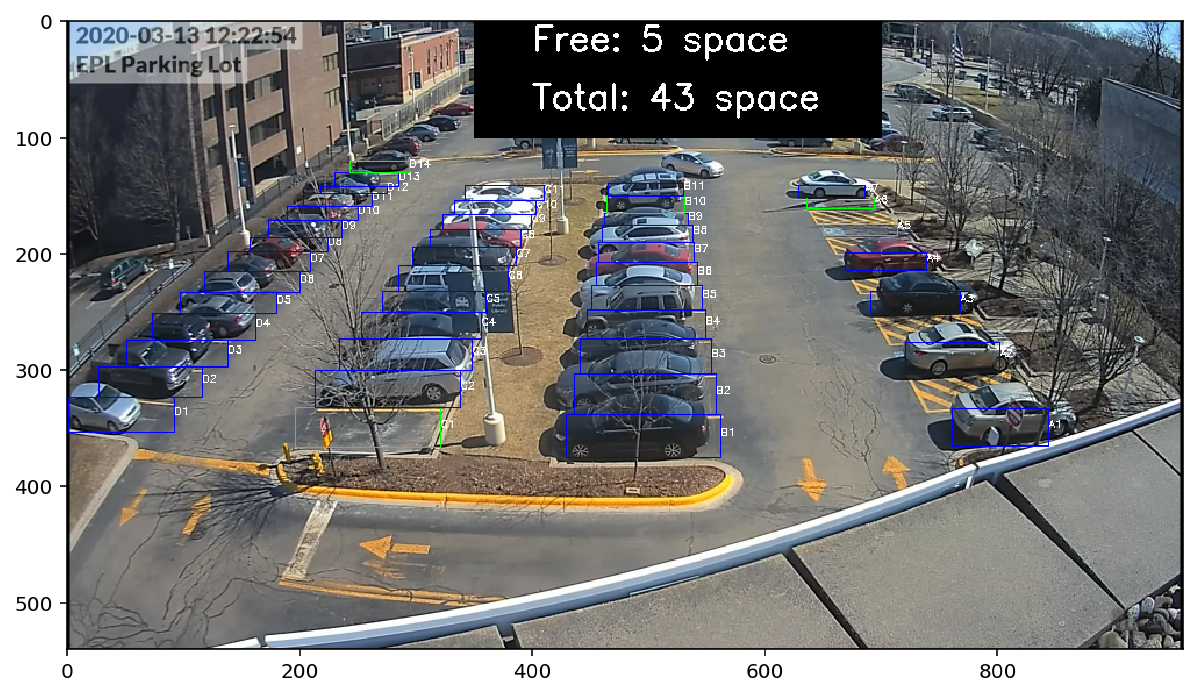

In [13]:
trainimg = cv2.imread("frame/test.jpg")
trainimg = cv2.resize(trainimg, (960, 540))
trainimg = cv2.cvtColor(trainimg, cv2.COLOR_BGR2RGB)
#use to predictions all space belong to
def predict_on_image(image):
    #init number of all space and free space
    all_count = 0
    free_space = 0
    for x1, y1, x2, y2 in all_space:
        
        (x1, y1, x2, y2) = (int(x1), int(y1), int(x2), int(y2))
        #set space id beside car space
        cv2.putText(image, "%s" %sid[all_count], (x2, int(y2+(y1-y2)/2)),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.3, (255, 255, 255), 1)        
        all_count += 1
        #crop this image
        spot_img = image[y2:y1, x1:x2]
        spot_img = cv2.resize(spot_img, (144, 48)) 
        #draw all space rectangle in red
        cv2.rectangle(image,(x1,y1),(x2,y2),(0,0,255),1)      
        label = make_prediction(spot_img)
        #if space is free then draw this space in green
        if label =='empty':
            free_space += 1
            cv2.rectangle(image,(x1,y1),(x2,y2),(0,255,0),1)
     #set number of free space and all space on the image  
    cv2.rectangle(image,(350, 0),(700,100),(0,0,0),-1)
    cv2.putText(image, "Free: %d space" %free_space, (400, 25),
            cv2.FONT_HERSHEY_SIMPLEX,
            1, (255, 255, 255), 2)
    cv2.putText(image, "Total: %d space" %all_count, (400, 75),
            cv2.FONT_HERSHEY_SIMPLEX,
            1, (255, 255, 255), 2)
    return image


plt.figure(figsize=(10,10))
plt.imshow(predict_on_image(trainimg))
plt.show()

In [15]:
video_name = 'cars.mp4'
cap = cv2.VideoCapture(video_name)
ret = True
count = 0
#init output video
#fourcc = cv2.VideoWriter_fourcc(*'MP4V')
fourcc = cv2.VideoWriter_fourcc(*'H264')
out = cv2.VideoWriter('output.mp4', fourcc, 12.83, (960, 540))
#to process each frame of video
while ret:
    ret, image = cap.read()
    if ret == False:
        break
    image = cv2.resize(image, (960, 540))
    new_image= predict_on_image(image)
    out.write(image)
    cv2.imshow('frame', new_image)
    if cv2.waitKey(60) & 0xFF == ord('q'):
        break
        
out.release()
cv2.destroyAllWindows()
cap.release()